# Prueba datos estrella Pulsar con datos batch y streamming:

## Packages necesarios:

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import OzaBagging


In [3]:
# Documentacion
#https://scikit-learn.org/stable/
#https://github.com/scikit-learn/scikit-learn 
#https://scikit-multiflow.github.io/

# datos estrella pulsar
#https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

Información del atributo:

Cada candidato se describe mediante 8 variables continuas y una variable de clase única. Los primeros cuatro son estadísticas simples obtenidas del perfil de pulso integrado (perfil plegado). Este es un conjunto de variables continuas que describen una versión resuelta en longitud de la señal que ha sido promediada en tiempo y frecuencia (ver [3] para más detalles). Las cuatro variables restantes se obtienen de manera similar de la curva DM-SNR (de nuevo, consulte [3] para obtener más detalles). Estos se resumen a continuación:

1. Media del perfil integrado.
2. Desviación estándar del perfil integrado.
3. Exceso de curtosis del perfil integrado.
4. Inclinación del perfil integrado.
5. Media de la curva DM-SNR.
6. Desviación estándar de la curva DM-SNR.
7. Exceso de curtosis de la curva DM-SNR.
8. Inclinación de la curva DM-SNR.
9. Class

Resumen de clase HTRU 2 17.898
ejemplos totales.
1,639 ejemplos positivos.
16,259 ejemplos negativos.

## Carga de datos:

### Desde Pandas :

In [4]:
df_stream = pd.read_csv('C:/Users/yerko/pulsar_stars.csv')

In [30]:
#dataset1 = pd.read_csv('C:/Users/yerko/Anaconda3/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars.csv')

In [5]:
df_stream.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [33]:
#df_stream.to_excel('output21.xlsx')

In [34]:
df_stream.describe()
df_stream.info()
a = df_stream.isnull().sum()
print (a[a>0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
Series

In [35]:
df_stream[' Excess kurtosis of the DM-SNR curve'].describe()

count    17898.000000
mean         8.303556
std          4.506092
min         -3.139270
25%          5.781506
50%          8.433515
75%         10.702959
max         34.539844
Name:  Excess kurtosis of the DM-SNR curve, dtype: float64

In [36]:
df_stream['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

<IPython.core.display.Javascript object>


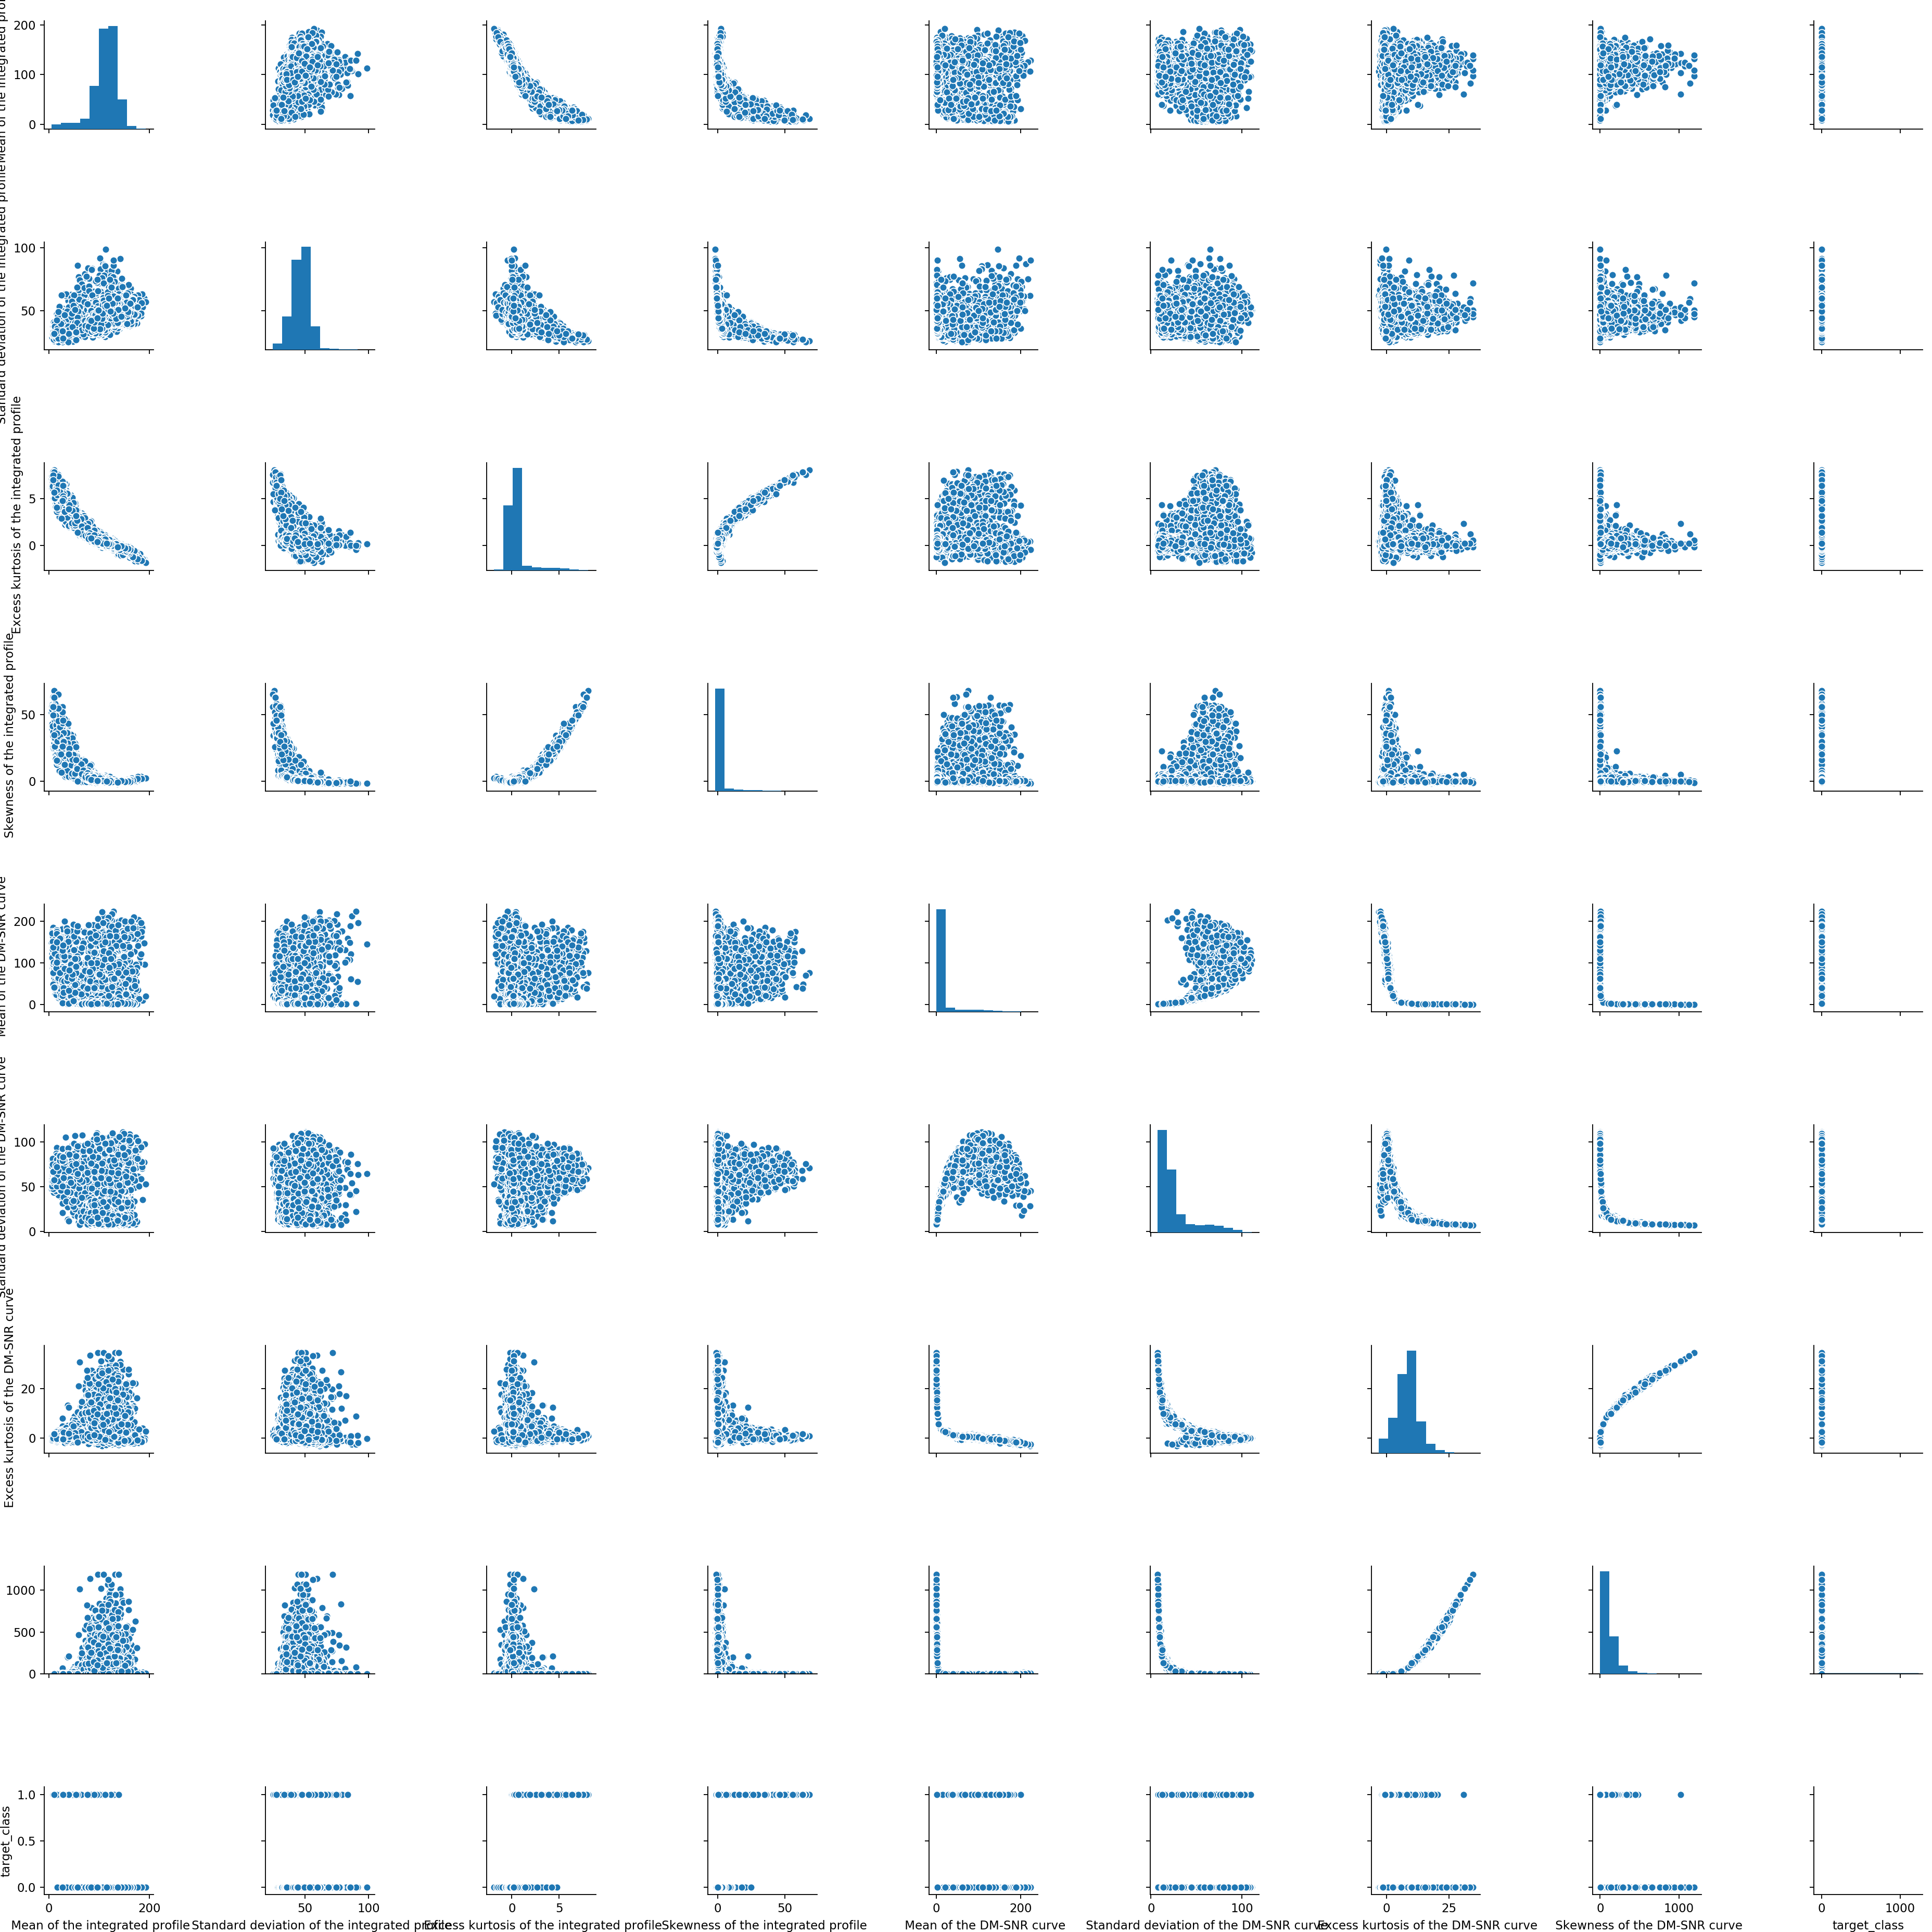

In [37]:

sns.pairplot(df_stream);

In [38]:
sns.distplot(df_stream[' Skewness of the DM-SNR curve'])

## Desde FileStream:

In [52]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream


In [53]:
stream = FileStream('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars.csv', target_idx=-1)
#C:\Users\yerko\Anaconda3\pkgs\scikit-multiflow-0.4.1-py37h79cbd7a_1\Lib\site-packages\skmultiflow\data\datasets
stream.prepare_for_use()

In [54]:
stream

FileStream(cat_features=None,
           filepath='C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars.csv',
           n_targets=1, target_idx=-1)

# Comparacion Batch y Streamming:

In [55]:
#################################----#######################################----#######################################

## Batch:

In [56]:
X = np.array(df_stream.drop(['target_class'],1))

y = np.array(df_stream['target_class'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

### Naive Bayes:

In [57]:
################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
nb_prediction_proba = model_nbayes.predict_proba(X_test)[:, 1]
model_nbayes.score(X_test,y_test)

0.9456238361266294

### Bagging con Naive Bayes como Weak Learner:

In [58]:
### Bagging Naives Bayes
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)


0.9459962756052142

In [59]:
from time import time
tiempo_inicial = time() 

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

11.380238056182861

### Boosting con Naive Bayes como Weak Learners:

In [60]:
from sklearn.ensemble import AdaBoostClassifier

# Utilizando AdaBoost para aumentar la precisión
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=800, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)



0.9225325884543761

In [61]:
from time import time
tiempo_inicial = time() 
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=800, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

18.24256992340088

In [62]:
#################################----#######################################----#######################################

## Importancia de variables 

In [63]:
"""
Create a Decision Stump
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps


In [66]:
# CARGAR DATOS
# -------------------------------------------------------------------
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
dataset = pd.read_csv('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars.csv')

clase_name = 'target_class' # nombre de variable a predecir
headers = dataset.columns.values.tolist()
headers.remove(clase_name)
clase   = dataset[clase_name].tolist() # array con variable a predecir
clase   = np.array(clase)


# CONVIERTE DATA.FRAME EN MATRIZ npy
# -------------------------------------------------------------------
dataset = dataset.drop(clase_name,1) # borra la clase del data set
dataset = dataset.to_numpy() # convierte en matriz
dataset = np.matrix(dataset) # convierte en matriz npy

# MODELO
# -------------------------------------------------------------------
model = ExtraTreesClassifier()
model.fit(dataset, clase)


# IMPORTANCIA VARIABLES
# -------------------------------------------------------------------
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':model.feature_importances_.tolist()
 })
print (var_imp.sort_values(by = 'v_importance', ascending=False))

                                         feature  v_importance
2      Excess kurtosis of the integrated profile      0.267491
3             Skewness of the integrated profile      0.205235
0                 Mean of the integrated profile      0.175195
5         Standard deviation of the DM-SNR curve      0.105756
4                       Mean of the DM-SNR curve      0.079698
1   Standard deviation of the integrated profile      0.065141
6            Excess kurtosis of the DM-SNR curve      0.056254
7                   Skewness of the DM-SNR curve      0.045231


1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)

In [67]:
X = np.array(df_stream.drop(['target_class'],1))

Y = np.array(df_stream['target_class'])

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


<IPython.core.display.Javascript object>


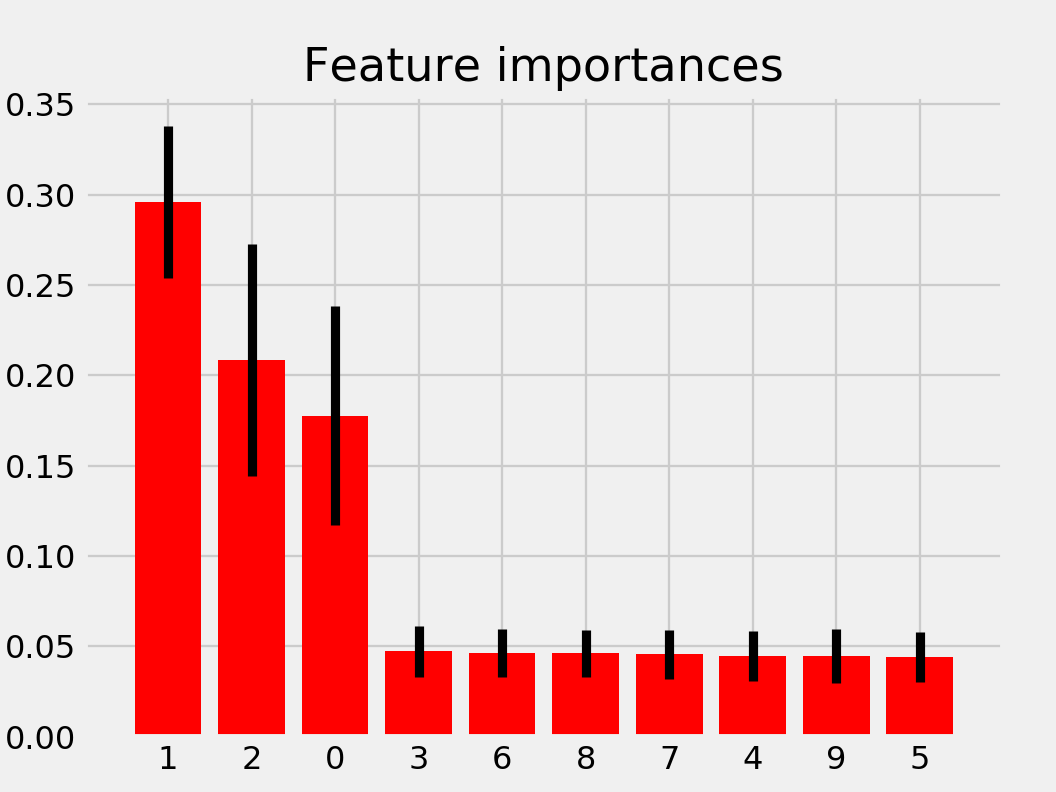

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
df_stream.iloc[:, [2,0,3,1,-1]].head()

,Excess kurtosis of the integrated profile,Mean of the integrated profile,Skewness of the integrated profile,Standard deviation of the integrated profile,target_class
0,-0.234571,140.562500,-0.699648,55.683782,0
1,0.465318,102.507812,-0.515088,58.882430,0
2,0.323328,103.015625,1.051164,39.341649,0
3,-0.068415,136.750000,-0.636238,57.178449,0
4,0.600866,88.726562,1.123492,40.672225,0


<IPython.core.display.Javascript object>


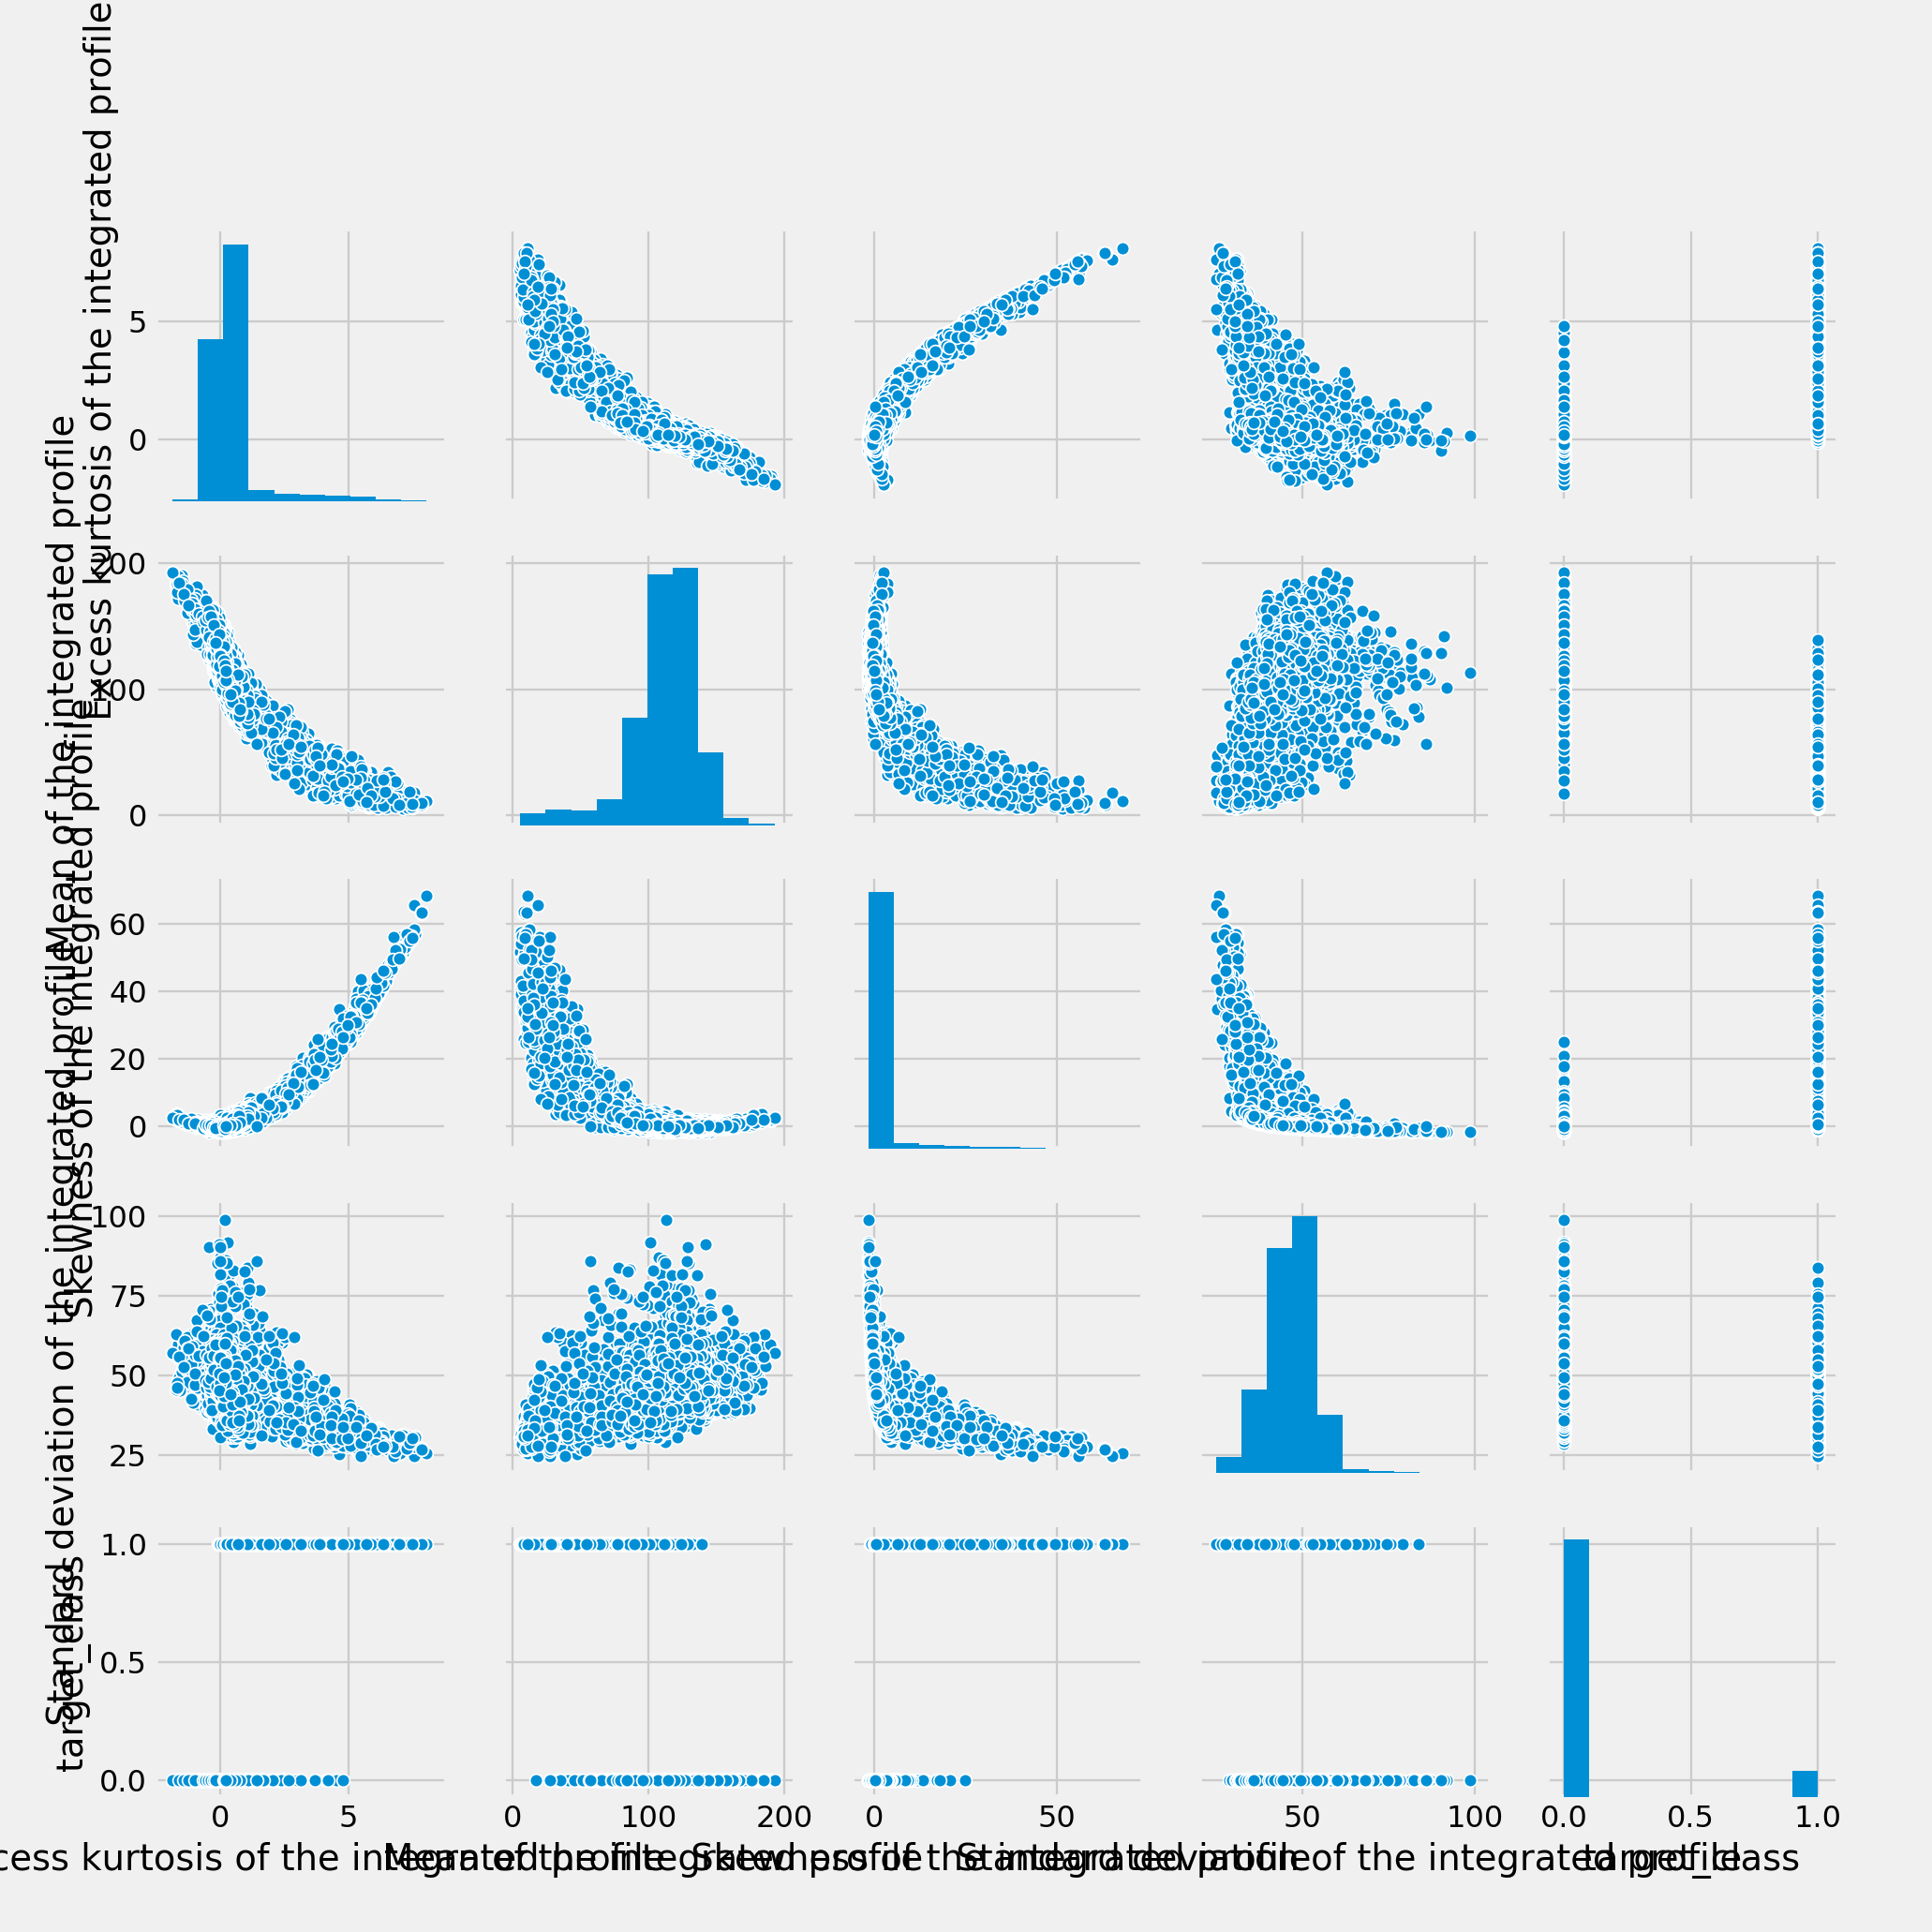

In [70]:
sns.pairplot(df_stream.iloc[:, [2,0,3,1,-1]])

In [7]:
df_stream1=df_stream.iloc[:, [2,0,3,1,-1]]
#df_stream1=df_stream
X = np.array(df_stream1.drop(['target_class'],1))
y = np.array(df_stream1['target_class'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

### Naive Bayes Classifier 

In [8]:

################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)


0.9662942271880819

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9659813733387469, 0.9662942271880819, 0.966127314792312, None)

In [74]:
from time import time
tiempo_inicial = time() 
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.00897216796875

### Bagging Naives Bayes

In [13]:
### Bagging Naives Bayes
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)


0.9662942271880819

In [14]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.9659813733387469, 0.9662942271880819, 0.966127314792312, None)

In [76]:
from time import time
tiempo_inicial = time() 
model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

9.455731630325317

### Boosting con Naive Bayes como Weak Learners:

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Utilizando AdaBoost para aumentar la precisión
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=800, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)



0.8916201117318435

In [16]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.8863706227006404, 0.8916201117318435, 0.8888517812331788, None)

In [78]:
from time import time
tiempo_inicial = time() 
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=800, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

15.478431940078735

In [79]:
#################################----#######################################----#######################################

In [80]:
### Bagging Naives Bayes
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)


### Boosting con Naive Bayes como Weak Learners:

from sklearn.ensemble import AdaBoostClassifier

# Utilizando AdaBoost para aumentar la precisión
model_boos = AdaBoostClassifier(base_estimator=model_nbayes, n_estimators=800, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos

model_boos.fit(X_train,y_train)

predictions = model_boos.predict(X_test)
model_boos.score(X_test,y_test)



#################################----#######################################----#######################################

0.8916201117318435

In [81]:
df_stream1=df_stream.iloc[:, [2,0,3,1,-1]]
#df_stream1=df_stream
X = np.array(df_stream1.drop(['target_class'],1))
y = np.array(df_stream1['target_class'])
y.shape
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [90]:
df_stream1.head()

,Excess kurtosis of the integrated profile,Mean of the integrated profile,Skewness of the integrated profile,Standard deviation of the integrated profile,target_class
0,-0.234571,140.562500,-0.699648,55.683782,0
1,0.465318,102.507812,-0.515088,58.882430,0
2,0.323328,103.015625,1.051164,39.341649,0
3,-0.068415,136.750000,-0.636238,57.178449,0
4,0.600866,88.726562,1.123492,40.672225,0


# Ajuste de modelos

In [91]:
df_stream=df_stream1
X = np.array(df_stream.drop(['target_class'],1))

Y = np.array(df_stream['target_class'])
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [92]:
dataset=df_stream
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_validate
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1)




predictions = np.mean(cross_validate(Tree_model,X,Y,cv=100)['test_score'])


print('The accuracy is: ',predictions*100,'%')
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def fit(self):
        # Set the descriptive features and the target feature
        X = self.dataset.drop(['target_class'],axis=1)
        Y = self.dataset['target_class'].where(self.dataset['target_class']==1,-1)

        # Initialize the weights of each sample with wi = 1/N and create a dataframe in which the evaluation is computed
        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the Decision Stump(s)
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) # Mind the deth one --> Decision Stump
            
            # We know that we must train our decision stumps on weighted datasets where the weights depend on the results of
            # the previous decision stumps. To accomplish that, we use the 'weights' column of the above created 
            # 'evaluation dataframe' together with the sample_weight parameter of the fit method.
            # The documentation for the sample_weights parameter sais: "[...] If None, then samples are equally weighted."
            # Consequently, if NOT None, then the samples are NOT equally weighted and therewith we create a WEIGHTED dataset 
            # which is exactly what we want to have.
            model = Tree_model.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['target_class'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['target_class'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])


            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
   
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)


            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            #print('The Accuracy of the {0}. model is : '.format(t+1),accuracy*100,'%')
            #print('The missclassification rate is: ',misclassification*100,'%')
        
        self.alphas = alphas
        self.models = models
            
    def predict(self):
        X_test = self.test_dataset.drop(['target_class'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['target_class'].reindex(range(len(self.test_dataset))).where(self.dataset['target_class']==1,-1)
    
        # With each model in the self.model list, make a prediction 
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
    
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))

   
        

        


    

The accuracy is:  97.61967233695312 %


In [ ]:
######Plot the accuracy of the model against the number of stump-models used##########

number_of_base_learners = 800

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(number_of_base_learners):
    model = Boosting(dataset,i,dataset)
    model.fit()
    model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()

<IPython.core.display.Javascript object>

## Streamming :

In [ ]:
#df_fin.to_excel('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_0/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars1.csv')

In [ ]:
stream = FileStream('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_0/Lib/site-packages/skmultiflow/data/datasets/pulsar_stars.csv')


In [ ]:
stream

In [10]:
stream.prepare_for_use()

In [11]:
stream.get_data_info()

'pulsar_stars.csv - 1 target(s), 2 classes'

### Naive bayes online:

In [12]:
from skmultiflow.bayes import NaiveBayes
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

<IPython.core.display.Javascript object>


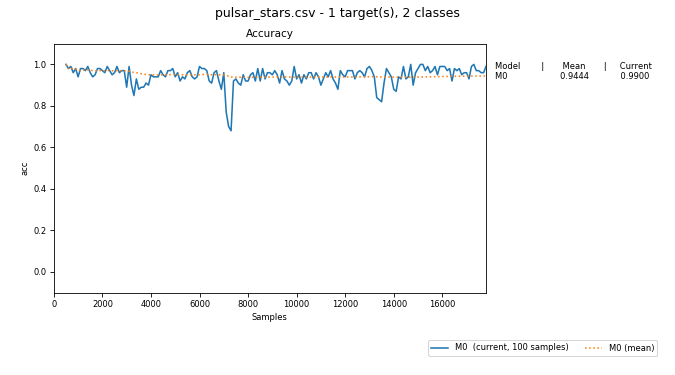

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [14.45s]
Processed samples: 17898
Mean performance:
M0 - Accuracy     : 0.9444


[GaussianNB(priors=None, var_smoothing=1e-09)]

In [22]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=500, n_wait=100, 
                                max_samples=20000, metrics=['accuracy'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf)

### Bagging Online con Naive Bayes como weak learner:

In [20]:
# 2 Bagging Oza  con base naives bayes 
nb=NaiveBayes()
clf1 = OzaBagging(base_estimator=nb, n_estimators=800)
clf1

OzaBagging(base_estimator=NaiveBayes(nominal_attributes=None), n_estimators=400,
           random_state=None)

<IPython.core.display.Javascript object>


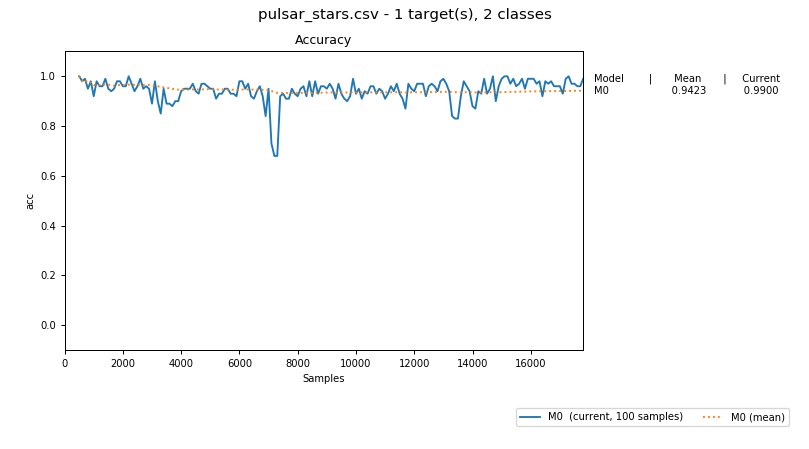

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [1258.96s]
Processed samples: 17898
Mean performance:
M0 - Accuracy     : 0.9423


[OzaBagging(base_estimator=NaiveBayes(nominal_attributes=None), n_estimators=400,
            random_state=None)]

In [21]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=500, n_wait=100, 
                                max_samples=20000, metrics=['accuracy'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf1)

### Boosting Online con Naive Bayes como weak learner:

In [23]:
from skmultiflow.meta import OnlineBoosting
from sklearn import tree
#  Boosting Oza  con base naives bayes 
nb1=NaiveBayes()
clf2 = OnlineBoosting(base_estimator=nb1, n_estimators=800)
clf2

OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
               drift_detection=True, n_estimators=None, random_state=None)

In [24]:

# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,pretrain_size=500,
                                n_wait = 100,
                                max_samples=10000, metrics=['accuracy'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf2)

<IPython.core.display.Javascript object>

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).


KeyboardInterrupt: 

In [91]:
##################################################################################################

In [ ]:
### Bagging Online con arbol de decision como weak learner:

In [52]:
################## Arbol ###############

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

0.9683426443202979

In [ ]:
### Bagging Arbol

model_bag2 = BaggingClassifier(model_arbol, 
                  n_estimators=1000, 
                  bootstrap = True, random_state = 1)
model_bag2.fit(X_train,y_train)

predictions = model_bag2.predict(X_test)
model_bag2.score(X_test,y_test)

In [ ]:
# 2 Bagging Oza  con base naives bayes 
nb=GaussianNB()
clf1 = OzaBagging(base_estimator=nb, n_estimators=10)
clf1

In [ ]:
### Bagging Online con percepetron de decision como weak learner:

In [ ]:
# 2 Bagging Oza  con base naives bayes 
nb=GaussianNB()
clf1 = OzaBagging(base_estimator=nb, n_estimators=10)
clf1

In [ ]:
### Bagging Online con regresion logistica como weak learner:

In [ ]:
# 2 Bagging Oza  con base naives bayes 
nb=GaussianNB()
clf1 = OzaBagging(base_estimator=nb, n_estimators=10)
clf1